# Create and visualize synthetic place cells (3 neurons)

In [1]:
import os
import subprocess
import sys
import warnings

warnings.filterwarnings("ignore")

gitroot_path = subprocess.check_output(
    ["git", "rev-parse", "--show-toplevel"], universal_newlines=True
)

os.chdir(os.path.join(gitroot_path[:-1], "neuralgeom"))
print("Working directory: ", os.getcwd())

sys_dir = os.path.dirname(os.getcwd())
sys.path.append(sys_dir)
print("Directory added to path: ", sys_dir)
sys.path.append(os.getcwd())
print("Directory added to path: ", os.getcwd())

Working directory:  /home/nmiolane/code/neuralgeom/neuralgeom
Directory added to path:  /home/nmiolane/code/neuralgeom
Directory added to path:  /home/nmiolane/code/neuralgeom/neuralgeom


In [2]:
import default_config as config
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
def create_bump_array(position, width):
    """Create array with Gaussian bump of specified position and width.

    Array is of length 360 filled with zeros, except for the bump.

    Parameters
    ----------
    - position (int): The index of the center of the bump.
    - width (int): The width of the bump.

    Returns
    -------
    - bump_array (numpy.ndarray): The array with the Gaussian bump.
    """
    # Create array of zeros with length 360
    bump_array = np.zeros(360)

    # Define the range of indices for the bump
    left = position - width // 2
    right = position + width // 2

    # Create the Gaussian bump
    x = np.linspace(-1, 1, width)
    bump = np.exp(-(x**2) * 5)  # Gaussian bump
    bump /= np.max(bump)  # Normalize to maximum amplitude of 1

    # Add the bump to the array
    bump_array[left:right] += bump

    return bump_array

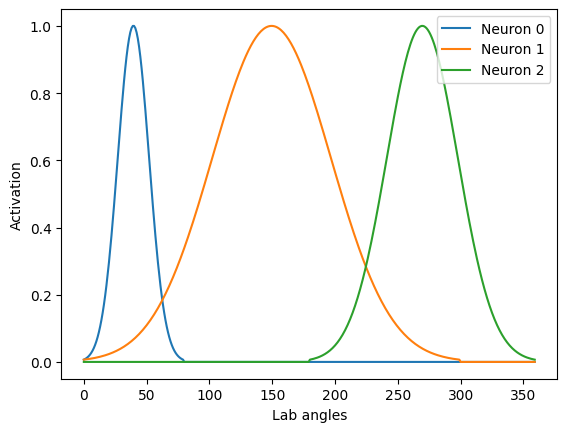

In [4]:
n0 = create_bump_array(40, 80)
n1 = create_bump_array(150, 300)
n2 = create_bump_array(270, 180)

plt.plot(np.arange(0, 360, 1), n0, c="C0", label="Neuron 0")
plt.plot(np.arange(0, 360, 1), n1, c="C1", label="Neuron 1")
plt.plot(np.arange(0, 360, 1), n2, c="C2", label="Neuron 2")
plt.xlabel("Lab angles")
plt.ylabel("Activation")
plt.legend();

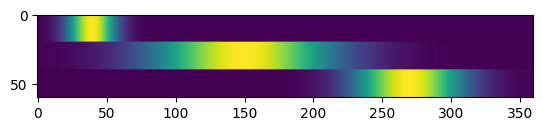

In [5]:
n0 = create_bump_array(40, 80)
n0 = np.reshape(np.repeat(n0, 20), (360, 20))

n1 = create_bump_array(150, 300)
n1 = np.reshape(np.repeat(n1, 20), (360, 20))

n2 = create_bump_array(270, 180)
n2 = np.reshape(np.repeat(n2, 20), (360, 20))

ntot = np.hstack([n0, n1, n2])

fig, axes = plt.subplots(nrows=1, ncols=1)
plt.imshow(ntot.T, label="Neuron 0", cmap="viridis")
# fig.savefig("notebooks/figures/synthetic_activations.svg")

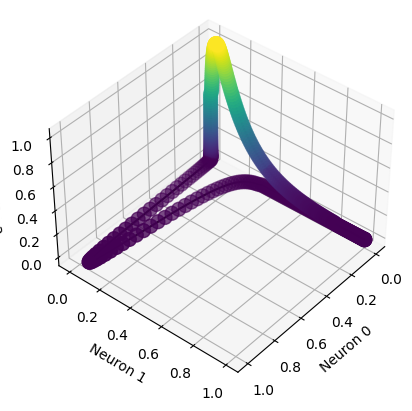

In [6]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.scatter(n0[:, 0], n1[:, 0], n2[:, 0], c=n2[:, 0], cmap="viridis", s=100)
ax.plot(
    n0[:, 0],
    n1[:, 0],
    n2[:, 0],
    c="black",
)
ax.set_xlabel("Neuron 0")
ax.set_ylabel("Neuron 1")
ax.set_zlabel("Neuron 2")
ax.view_init(elev=40.0, azim=40)
# fig.savefig("notebooks/figures/synthetic_place_cells_n2.svg")

# Verify that the function incorporated in synthetic.py generates correct data

In [7]:
from neuralgeom.datasets.synthetic import load_three_place_cells

dataset, labels = load_three_place_cells()

INFO:root:Using pytorch backend


In [8]:
dataset.shape

(360, 3)

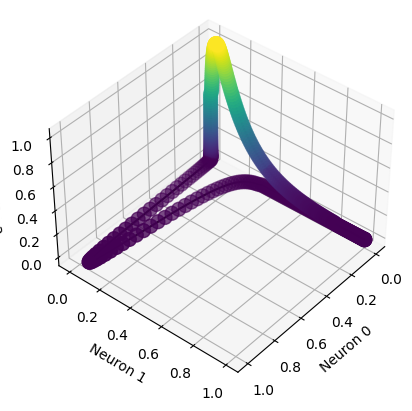

In [10]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.scatter(dataset[:, 0], dataset[:, 1], dataset[:, 2], c=n2[:, 0], cmap="viridis", s=100)
ax.plot(
    dataset[:, 0],
    dataset[:, 1],
    dataset[:, 2],
    c="black",
)
ax.set_xlabel("Neuron 0")
ax.set_ylabel("Neuron 1")
ax.set_zlabel("Neuron 2")
ax.view_init(elev=40.0, azim=40)